In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

import matplotlib.pyplot as plt


In [2]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df['BMI'].to_numpy().reshape(-1, 1)

y = df['Glucose'].to_numpy().reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [5]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [6]:
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

print(f'Coefficients: {regr.coef_}')

print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

Coefficient of determination: 0.051710037956085975
Coefficients: [[0.88558366]]
Mean squared error: 1070.586081656323


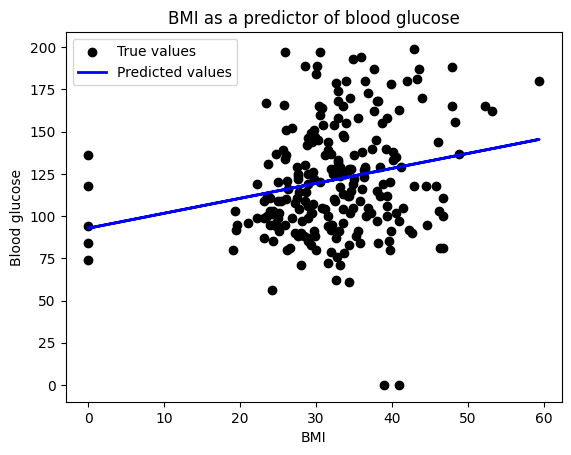

In [27]:
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')

plt.xlabel('BMI')
plt.ylabel('Blood glucose')

plt.legend(loc="upper left")

plt.title('BMI as a predictor of blood glucose')

plt.show()

In [7]:
prediction_df = pd.DataFrame()

prediction_df['BMI'] = np.arange(60, 70)

prediction_df['Glucose'] = regr.predict(np.arange(60, 70).reshape(-1,1))

prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


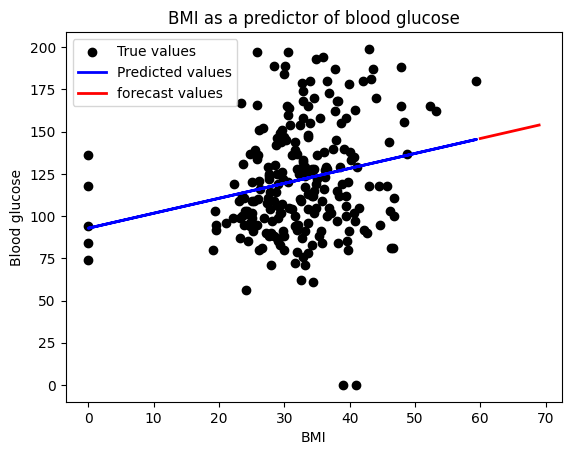

In [8]:
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='red', linewidth=2, label='forecast values')

plt.xlabel('BMI')
plt.ylabel('Blood glucose')

plt.legend(loc="upper left")

plt.title('BMI as a predictor of blood glucose')

plt.show()

In [1]:
import statsmodels.api as sm

alpha = 0.05

lr = sm.OLS(y_train, sm.add_constant(X_train)).fit()
conf_interval = lr.conf_int(alpha)

# print(conf_interval)

lr_df = pd.DataFrame(
    {'BMI':X_test.ravel(),
     'Glucose':y_pred.ravel()}
)

lr_df = lr_df.sort_values('BMI')

lr_df['Glucose lower CI'] = lr_df['Glucose'] - 82
lr_df['Glucose upper CI'] = lr_df['Glucose'] +104

plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='red', linewidth=2, label='forecast values')

plt.xlabel('BMI')
plt.ylabel('Blood glucose')

plt.legend(loc="upper left")

plt.title('BMI as a predictor of blood glucose')

plt.fill_between(lr_df['BMI'], lr_df['Glucose lower CI'], lr_df['Glucose upper CI'], color='blue', alpha=.1)
plt.fill_between(prediction_df['BMI'], (prediction_df['Glucose'] - 82), (prediction_df['Glucose'] + 104), color='red', alpha=.1)

plt.show()


NameError: name 'y_train' is not defined

In [43]:
# X and y
X = df[['BMI', 'BloodPressure']]
y = df['Glucose'].to_numpy().reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# make a regression object
mv_regr = linear_model.LinearRegression()

# fit and predict
mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)

#check out our coefficients etc
print(mv_regr.coef_)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# put in some values to predict outcomes
mv_regr.predict(pd.DataFrame(
    [
        {'BMI':60,
         'BloodPressure':60},
        {'BMI':29,
         'BloodPressure':60},
    ]
))

[[0.96604869 0.13724405]]
953.6875803498634
0.0003725302241326389


array([[147.58195877],
       [117.63444946]])